# Analysis on laurel logs

In [1]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
sys.path.append('../')
sys.path.append('../src/')
sys.path.append('../spell/')

In [3]:
import Reader
import ParamsExtractor3
import DataPreprocessor
import DeepLearningAnomalyDetection2

2024-07-10 14:49:24.015417: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 14:49:24.016088: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 14:49:24.021645: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 14:49:24.076089: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 14:49:24.880627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## Training

In [4]:
log_types = ['laurel']
dates = ['20240418', '20240420', '20240429']
login_node_numbers = ['01', '02', '03', '10']

# Generate the list of file paths
file_paths = [f'/../../../temp_logs/{date}/login{num}.{logtype}.log' for date in dates for num in login_node_numbers for logtype in log_types]

# Filter the list to include only existing files
existing_file_paths = [path for path in file_paths if os.path.exists(path)]
print(existing_file_paths)

df_list = []

for file_path in existing_file_paths:
    r = Reader.Reader(file_path)
    df = r.read_file(file_path)
    df_list.append(df)

['/../../../temp_logs/20240418/login01.laurel.log', '/../../../temp_logs/20240418/login02.laurel.log', '/../../../temp_logs/20240418/login03.laurel.log', '/../../../temp_logs/20240418/login10.laurel.log', '/../../../temp_logs/20240420/login01.laurel.log', '/../../../temp_logs/20240420/login02.laurel.log', '/../../../temp_logs/20240420/login03.laurel.log', '/../../../temp_logs/20240420/login10.laurel.log']


In [5]:
len(df_list)

8

In [6]:
df_after = []

for i, df in enumerate(df_list):
    p = ParamsExtractor3.ParamsExtractor(df)
    df = p.convert_params(df)
    new_df = p.get_params()
    df_after.append(new_df)
    df_list[i] = pd.concat([df_list[i], new_df], axis=1)

In [7]:
df_list[0].head()

,host,ident,message,severity,facility,time,severity_numbers,facility_numbers,severity_scores,timedelta,suid,cap_fp,comm,parent_comm,exit,n_dang,n_dang_no_cron,fp_length
0,login01,laurel,"""1713391196.350:55343008"",""NODE"":""login01"",""SY...",info,local6,2024-04-18 00:00:03 +0200,6,22,1.0,0.0,126858,0,squeue,bash,0,2,0,92
1,login01,laurel,"""1713391198.212:55343009"",""NODE"":""login01"",""SY...",info,local6,2024-04-18 00:00:03 +0200,6,22,1.0,0.0,0,0,ping,pacemaker-execd,0,0,0,38
2,login01,laurel,"""1713391198.214:55343010"",""NODE"":""login01"",""SY...",info,local6,2024-04-18 00:00:03 +0200,6,22,1.0,0.0,0,0,basename,ping,0,0,0,28
3,login01,laurel,"""1713391198.220:55343011"",""NODE"":""login01"",""SY...",info,local6,2024-04-18 00:00:03 +0200,6,22,1.0,0.0,0,0,egrep,ping,0,0,0,28
4,login01,laurel,"""1713391198.221:55343012"",""NODE"":""login01"",""SY...",info,local6,2024-04-18 00:00:03 +0200,6,22,1.0,0.0,0,0,grep,ping,0,0,0,21


In [8]:
df_list[0].iloc[0]['message']

'"1713391196.350:55343008","NODE":"login01","SYSCALL":{"arch":"0xc000003e","syscall":59,"success":"yes","exit":0,"items":2,"ppid":29378,"pid":37632,"auid":126858,"uid":126858,"gid":25200,"euid":126858,"suid":126858,"fsuid":126858,"egid":25200,"sgid":25200,"fsgid":25200,"tty":"pts38","ses":703112,"comm":"squeue","exe":"/opt/slurm/23.11.5/bin/squeue","key":"auditcmd","ARCH":"x86_64","SYSCALL":"execve","AUID":"cmatteuc","UID":"cmatteuc","GID":"interactive","EUID":"cmatteuc","SUID":"cmatteuc","FSUID":"cmatteuc","EGID":"interactive","SGID":"interactive","FSGID":"interactive","ARGV":["0x564021c6aff0","0x564021c6bdf0","0x564021c34470","0x8"]},"EXECVE":{"argc":3,"ARGV":["squeue","-u","cmatteuc"],"ENV":{"LD_LIBRARY_PATH":"/g100_work/PROJECTS/spack/v0.17/prod/0.17.1/install/0.17/linux-centos8-skylake_avx512/gcc-8.4.1/anaconda3-2021.05-alnfpd33vtv6tt7sf6iq5ngwv7nqgeah/lib:/cineca/prod/opt/compilers/intel/oneapi-2022/binary/mpi/latest/libfabric/lib/prov:/cineca/prod/opt/compilers/intel/oneapi-2022

In [9]:
for i, df in enumerate(df_list):
    d = DataPreprocessor.DataPreprocessor(df)
    enc = d.drop_and_hash_encode()
    df_list[i] = enc

print(df_list[0].head())

   severity_scores  timedelta    suid  cap_fp      comm      parent_comm  \
0              1.0        0.0  126858       0    squeue             bash   
1              1.0        0.0       0       0      ping  pacemaker-execd   
2              1.0        0.0       0       0  basename             ping   
3              1.0        0.0       0       0     egrep             ping   
4              1.0        0.0       0       0      grep             ping   

   exit  n_dang  n_dang_no_cron  fp_length  ...  col_10  col_11  col_12  \
0     0       2               0         92  ...       0       0       0   
1     0       0               0         38  ...       0       0       0   
2     0       0               0         28  ...       0       0       0   
3     0       0               0         28  ...       0       0       0   
4     0       0               0         21  ...       0       0       0   

   col_13  col_14  col_15  col_16  col_17  col_18  col_19  
0       0       0       0       

In [10]:
for df in df_list:
    print(df.shape)

(1000, 30)
(1000, 30)
(1000, 30)
(1000, 30)
(1000, 30)
(1000, 30)
(1000, 30)
(1000, 30)


In [11]:
normal_dataset = df_list[0]

for i in range(1,len(df_list)):
    normal_dataset = np.vstack([normal_dataset, df_list[i]])

In [12]:
normal_dataset.shape

(8000, 30)

## Anomalies' dataset

In [13]:
log_types = ['laurel']

# Generate the list of file paths
file_paths = [f'../data/linpeas_logs_2_silent_attack/{logtype}_logs.log' for logtype in log_types]

# Filter the list to include only existing files
existing_file_paths = [path for path in file_paths if os.path.exists(path)]

an_df_list = []

for file_path in existing_file_paths:
    r = Reader.Reader(file_path)
    df = r.read_file_3(file_path)
    df.columns = ['hostname', 'ident', 'message', 'severity', 'facility', 'time']
    an_df_list.append(df)

In [14]:
an_df_list[0].head()

,hostname,ident,message,severity,facility,time
0,localhost,laurel,type=PATH msg=audit(1720542157.835:4953): item...,info,local0,2024-07-09T12:22:37.836871-04:00
1,localhost,laurel,type=PROCTITLE msg=audit(1720542157.835:4953):...,info,local0,2024-07-09T12:22:37.836872-04:00
2,localhost,laurel,type=SYSCALL msg=audit(1720542157.835:4953): a...,info,local0,2024-07-09T12:22:37.836855-04:00
3,localhost,laurel,type=SYSCALL msg=audit(1720542157.835:4954): a...,info,local0,2024-07-09T12:22:37.836865-04:00
4,localhost,laurel,type=EXECVE msg=audit(1720542157.835:4953): ar...,info,local0,2024-07-09T12:22:37.836866-04:00


In [15]:
import LaurelParamsExtractor

In [16]:
an_df_after = []

for i, df in enumerate(an_df_list):
    p = ParamsExtractor3.ParamsExtractor(df)
    df = p.convert_params(df)
    l = LaurelParamsExtractor.LaurelParamsExtractor()
    new_df = l.get_params(df)
    an_df_after.append(new_df)
    an_df_list[i] = pd.concat([an_df_list[i], new_df], axis=1)

In [17]:
an_df_list[0].head()

,hostname,ident,message,severity,facility,time,severity_numbers,facility_numbers,severity_scores,timedelta,suid,comm,exit
0,localhost,laurel,type=PATH msg=audit(1720542157.835:4953): item...,info,local0,2024-07-09T12:22:37.836871-04:00,6,16,1.0,0.000000,-1,-1,-1
1,localhost,laurel,type=PROCTITLE msg=audit(1720542157.835:4953):...,info,local0,2024-07-09T12:22:37.836872-04:00,6,16,1.0,0.000001,-1,-1,-1
2,localhost,laurel,type=SYSCALL msg=audit(1720542157.835:4953): a...,info,local0,2024-07-09T12:22:37.836855-04:00,6,16,1.0,-0.000017,1000,"""ps""",0
3,localhost,laurel,type=SYSCALL msg=audit(1720542157.835:4954): a...,info,local0,2024-07-09T12:22:37.836865-04:00,6,16,1.0,0.000010,1000,"""grep""",0
4,localhost,laurel,type=EXECVE msg=audit(1720542157.835:4953): ar...,info,local0,2024-07-09T12:22:37.836866-04:00,6,16,1.0,0.000001,-1,-1,-1


In [18]:
for i, df in enumerate(an_df_list):
    d = DataPreprocessor.DataPreprocessor(df)
    enc = d.drop_and_hash_encode()
    an_df_list[i] = enc

print(an_df_list[0].head())

    hostname  severity_scores  timedelta  suid    comm exit  col_0  col_1  \
0  localhost              1.0   0.000000    -1      -1   -1      0      0   
1  localhost              1.0   0.000001    -1      -1   -1      0      0   
2  localhost              1.0  -0.000017  1000    "ps"    0      0      0   
3  localhost              1.0   0.000010  1000  "grep"    0      0      0   
4  localhost              1.0   0.000001    -1      -1   -1      0      0   

   col_2  col_3  ...  col_10  col_11  col_12  col_13  col_14  col_15  col_16  \
0      0      0  ...       0       0       0       0       0       0       1   
1      0      0  ...       0       0       0       0       0       0       1   
2      0      0  ...       0       0       0       0       0       0       1   
3      0      0  ...       0       0       0       0       0       0       1   
4      0      0  ...       0       0       0       0       0       0       1   

   col_17  col_18  col_19  
0       0       0       0  


In [19]:
# we test secure
# we take the lines from the 230th (detected pwd bruteforcing)
anomalous_dataset = an_df_list[0][230:]

In [20]:
anomalous_dataset.shape

(111273, 26)

In [21]:
anomalous_dataset.columns

Index(['hostname', 'severity_scores', 'timedelta', 'suid', 'comm', 'exit',
       'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19'],
      dtype='object')

In [22]:
df_list[0].columns

Index(['severity_scores', 'timedelta', 'suid', 'cap_fp', 'comm', 'parent_comm',
       'exit', 'n_dang', 'n_dang_no_cron', 'fp_length', 'col_0', 'col_1',
       'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9',
       'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16',
       'col_17', 'col_18', 'col_19'],
      dtype='object')

In [23]:
for i, df in enumerate(df_list):
    df_list[i] = df.drop(['cap_fp', 'parent_comm', 'n_dang', 'n_dang_no_cron', 'fp_length', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9','col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16','col_17', 'col_18', 'col_19'], axis=1)

In [24]:
anomalous_dataset = anomalous_dataset.drop(['hostname', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9','col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16','col_17', 'col_18', 'col_19'], axis=1)

In [25]:
df_list[0].columns

Index(['severity_scores', 'timedelta', 'suid', 'comm', 'exit'], dtype='object')

In [26]:
anomalous_dataset.columns

Index(['severity_scores', 'timedelta', 'suid', 'comm', 'exit'], dtype='object')

In [27]:
df_list[0].head()

,severity_scores,timedelta,suid,comm,exit
0,1.0,0.0,126858,squeue,0
1,1.0,0.0,0,ping,0
2,1.0,0.0,0,basename,0
3,1.0,0.0,0,egrep,0
4,1.0,0.0,0,grep,0


In [28]:
import EncodeCommand
encoder = EncodeCommand.EncodeCommand()

In [29]:
for i, df in enumerate(df_list):
    df_encoded = encoder.encode_command(df)
    df_list[i] = df_encoded

print(df_list[0].head())

   severity_scores  timedelta    suid      comm  exit  enc_comm
0              1.0        0.0  126858    squeue     0         1
1              1.0        0.0       0      ping     0         2
2              1.0        0.0       0  basename     0         3
3              1.0        0.0       0     egrep     0         4
4              1.0        0.0       0      grep     0         5


In [30]:
for i, df in enumerate(an_df_list):
    df_encoded = encoder.encode_command(df)
    an_df_list[i] = df_encoded

print(an_df_list[0].head())

    hostname  severity_scores  timedelta  suid    comm exit  col_0  col_1  \
0  localhost              1.0   0.000000    -1      -1   -1      0      0   
1  localhost              1.0   0.000001    -1      -1   -1      0      0   
2  localhost              1.0  -0.000017  1000    "ps"    0      0      0   
3  localhost              1.0   0.000010  1000  "grep"    0      0      0   
4  localhost              1.0   0.000001    -1      -1   -1      0      0   

   col_2  col_3  ...  col_11  col_12  col_13  col_14  col_15  col_16  col_17  \
0      0      0  ...       0       0       0       0       0       1       0   
1      0      0  ...       0       0       0       0       0       1       0   
2      0      0  ...       0       0       0       0       0       1       0   
3      0      0  ...       0       0       0       0       0       1       0   
4      0      0  ...       0       0       0       0       0       1       0   

   col_18  col_19  enc_comm  
0       0       0        3

In [31]:
anomalous_dataset_encoded = encoder.encode_command(anomalous_dataset)

In [32]:
anomalous_dataset_encoded.head()

,severity_scores,timedelta,suid,comm,exit,enc_comm
230,1.0,0.000003,1000,"""grep""",0,2
231,1.0,0.000001,-1,-1,-1,40
232,1.0,0.000002,-1,-1,-1,40
233,1.0,0.000002,-1,-1,-1,40
234,1.0,0.000002,-1,-1,-1,40


In [33]:
anomalous_dataset_encoded.columns

Index(['severity_scores', 'timedelta', 'suid', 'comm', 'exit', 'enc_comm'], dtype='object')

## Library implementation

In [34]:
normal_dataset_df = pd.DataFrame(df_list[0], columns=['severity_scores', 'timedelta', 'suid', 'exit', 'enc_comm'])
anomalous_dataset_df = pd.DataFrame(anomalous_dataset_encoded, columns=['severity_scores', 'timedelta', 'suid', 'exit', 'enc_comm'])

Mean normal reconstruction error: 0.013506295880856363
Mean anomalous reconstruction error: 0.015628807930380056


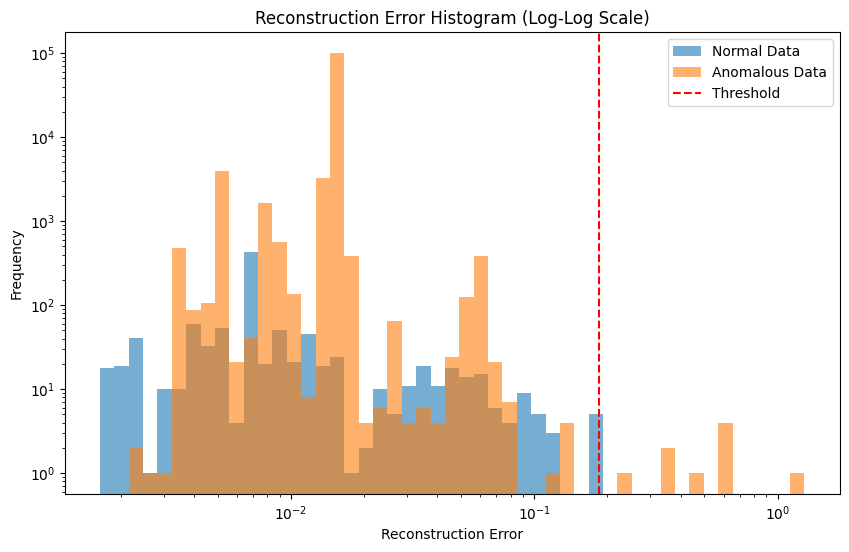

Threshold for anomaly detection: 0.1848288166575754
Number of anomalies detected: 9
Number of false positives detected: 2


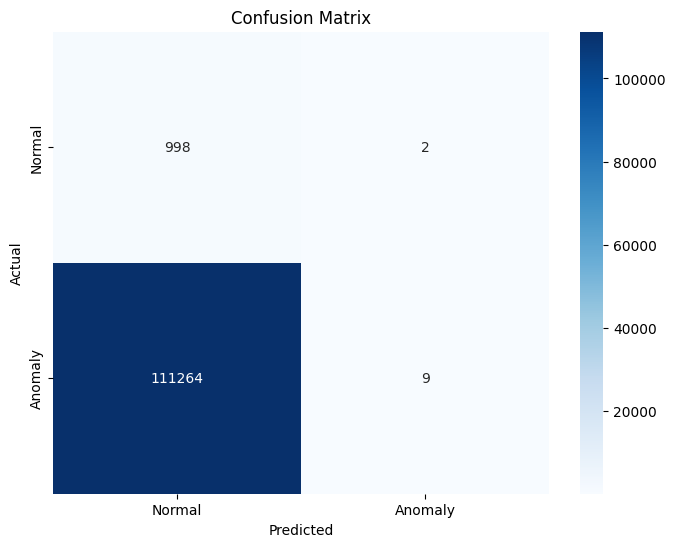

In [35]:
d_an_det = DeepLearningAnomalyDetection2.DeepLearningAnomalyDetection()
true_anomalies, reconstructed_anomalies, fp_ = d_an_det.train_test_model(normal_dataset_df, anomalous_dataset_df, 'autoencoder', laurel=1, plots=[0,0,1,1])

Mean normal reconstruction error: 0.04802839885588214
Mean anomalous reconstruction error: 0.05022221359875976


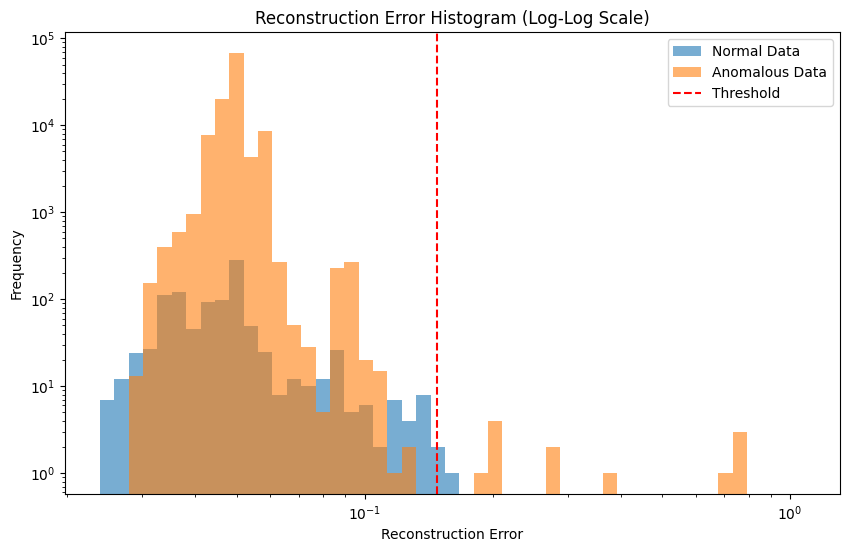

Threshold for anomaly detection: 0.14799575411647217
Number of anomalies detected: 13
Number of false positives detected: 3


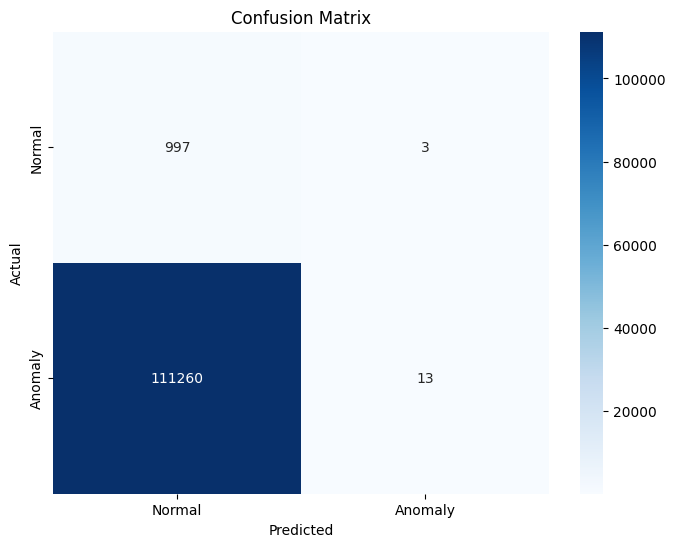

In [36]:
d_an_det = DeepLearningAnomalyDetection2.DeepLearningAnomalyDetection()
true_anomalies_vae, reconstructed_anomalies_vae, fp = d_an_det.train_test_model(normal_dataset_df, anomalous_dataset_df, 'vae', laurel=1, plots=[0,0,1,1])

In [37]:
d_an_det.ensemble_method(normal_dataset_df, anomalous_dataset, plots=[1])

KeyError: "['log key'] not in index"

In [ ]:
# Example predictions from two models (replace with your actual predictions)
predictions_model1 = reconstructed_anomalies
predictions_model2 = reconstructed_anomalies_vae

# Combine predictions using logical OR (voting scheme)
combined_predictions = np.logical_and(predictions_model1, predictions_model2).astype(int)

# Example thresholding (adjust as needed)
threshold = 0.5  # Simple majority voting

# Convert to final anomaly predictions based on threshold
final_predictions = (combined_predictions >= threshold).astype(int)

# Print or use the final predictions
print("Combined Predictions:", combined_predictions)
print("Final Anomaly Predictions:", final_predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Example ground truth and predictions (replace with your actual data)
ground_truth = true_anomalies
predictions = final_predictions
            
# Calculate confusion matrix
cm = confusion_matrix(ground_truth, predictions)
            
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=['Normal', 'Anomaly'], 
                        yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()